<a href="https://colab.research.google.com/github/adash333/CodeSandbox-Vue-Bulma-Template/blob/master/200726_ggplot_line_chart_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 後で使用するので、とりあえずtidyverseを使用するための準備
library(tidyverse)

# read_excel()関数を使用するための準備
library(readxl)

# colaboratoryでは content フォルダにbook2.xlsxなどをアップロードする
# Rでのデフォルトの場所は content　フォルダとなっている
# d に、book2.xlsxの1番目のsheetをtibbleデータとして代入する
# d <- read_excel("book2.xlsx", sheet=1)
# d

# Google Colaboratoryでは、book2.xlsxはすぐに消えてしまうので、
# 今回は、以下にtibbleでbook2.xlsxの中身を定義しておきます。

d <- tribble(
  ~id, ~age, ~sex, ~DM,	~HbA1c00M, ~HbA1c01M,	~HbA1c02M, ~HbA1c03M,
  1,	56,	"M",	1,	7.3,	7.4,	7.3,	7.4,
  2,	77,	"F",	1,	8.3,	8.4,	8.3,	8.2,
  3,	68,	"M",	1,	7.1,	7,	7,	7,
  4,	81,	"F",	1,	7.6,	7.4,	7.3,	7.4,
  5,	42,	"M",	1,	10.1,	8.4,	7.3,	6.5,
  6,	65,	"M",	1,	6.1,	6.2,	6.,	6.3,
  7,	68,	"F",	1,	7.8,	7.4,	7.9,	8.4,
)
d

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


id,age,sex,DM,HbA1c00M,HbA1c01M,HbA1c02M,HbA1c03M
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,M,1,7.3,7.4,7.3,7.4
2,77,F,1,8.3,8.4,8.3,8.2
3,68,M,1,7.1,7.0,7.0,7.0
4,81,F,1,7.6,7.4,7.3,7.4
5,42,M,1,10.1,8.4,7.3,6.5
6,65,M,1,6.1,6.2,6.0,6.3
7,68,F,1,7.8,7.4,7.9,8.4


In [ ]:
# 横長のデータを縦長(tidy data)にする
tidy_d <- gather(d, 
  key="time", value="HbA1c",               # 新しくできる列の名前を指定
  HbA1c00M, HbA1c01M, HbA1c02M,	HbA1c03M)  # 変形する対象の列を指定
tidy_d

id,age,sex,DM,time,HbA1c
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,56,M,1,HbA1c00M,7.3
2,77,F,1,HbA1c00M,8.3
3,68,M,1,HbA1c00M,7.1
4,81,F,1,HbA1c00M,7.6
5,42,M,1,HbA1c00M,10.1
6,65,M,1,HbA1c00M,6.1
7,68,F,1,HbA1c00M,7.8
1,56,M,1,HbA1c01M,7.4
2,77,F,1,HbA1c01M,8.4


In [ ]:
d2 <- tidy_d %>% 
  group_by(time) %>%
  summarise(HbA1c_avg = mean(HbA1c), HbA1c_sd = sd(HbA1c))
d2

time,HbA1c_avg,HbA1c_sd
<chr>,<dbl>,<dbl>
HbA1c00M,7.757143,1.2380861
HbA1c01M,7.457143,0.7721337
HbA1c02M,7.300000,0.7234178
HbA1c03M,7.314286,0.7925246


Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”

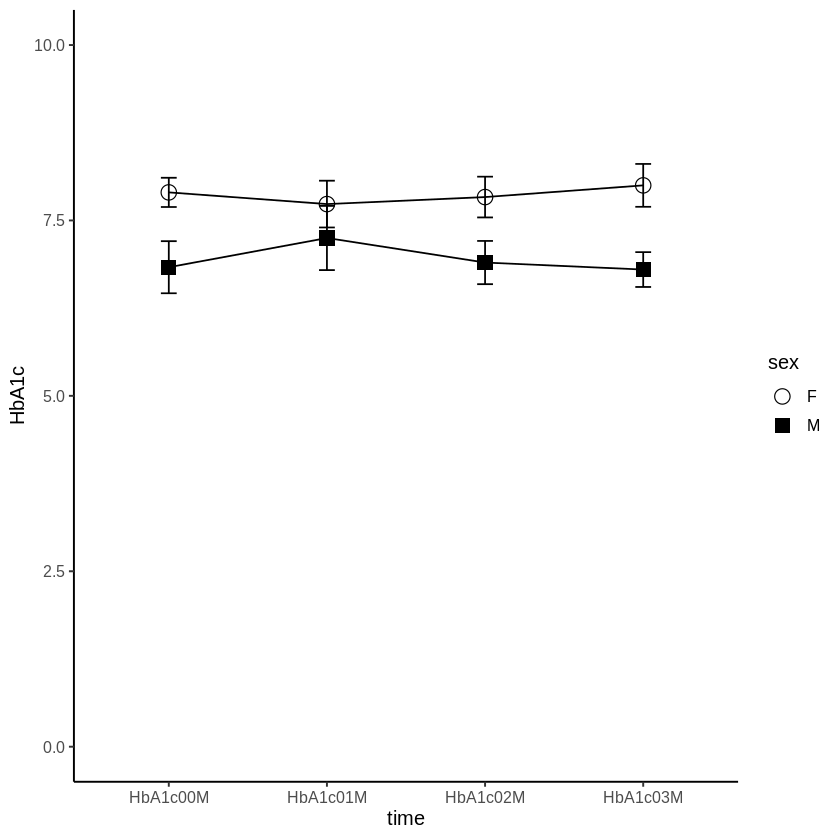

In [ ]:
# Google Colaboratoryでは以下のコードはうまくいかない
# install.packages("ggplotgui")
# library(ggplotgui)
# ggplot_shiny(dataset=d2)

# ggplot()関数とstat_summary()関数で折れ線グラフを描く
g <- ggplot(data = tidy_d, aes(x = time, y=HbA1c)) +
  theme_set(theme_classic(base_size = 12)) +
  stat_summary(
    aes(group=sex),    # sex性別ごとに
    fun.y=mean,        # 平均値を
    geom="line",       # 線でつなげて
    colour="black",    # 色は黒で
    size=0.5          # 先の太さは0.5mm
  ) 

# エラーバーの追加
# Google Colaboratoryでは、fun.data = mean_sdl (標準偏差)はうまくいかない
# R Studioではうまくいくよう
g <- g +
  stat_summary(aes(group=sex),  # sex性別ごとに
    fun.data=mean_se,          # mean_seで標準誤差、#mean_cl_normalで95%信頼区間(正規分布)
    geom="errorbar",
    size=0.5,                   # 線の太さ
    width=0.1
  )

# エラーバーの上から重ねて、点(マーク)を描き入れる
g <-g +
  stat_summary(
    aes(shape=sex),   # 種類ごとに点の形を変えて
    fun.y=mean,        # 種類ごとの平均値のところに
    geom="point",      # 点で
    colour="black",
    size=4)

# 形の指定
# 点の形を１番◯、１５番■(、２３番◇)にマニュアル変更
g <- g +
  scale_shape_manual(values=c(1,15))

# 原点を左下にする
g <- g +
  scale_y_continuous(limits = c(0,10))

g